# Predicting Car Prices

In this project I will be using a dataset from [UC Irvine's Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php), saved [here](https://archive.ics.uci.edu/ml/datasets/automobile), to train a model for the prediction of car prices.

Let's explore the dataset and familiarise ourselves with it.

In [1]:
import pandas as pd
cols = ['symboling', 'normalised_losses', 'make', 'fuel_type', 
        'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 
        'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 
        'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 
        'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
pd.set_option('display.max_columns', 50)
cars.head()

,symboling,normalised_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
continuous_cols = ['normalised_losses', 'length', 'width', 'height', 
                   'wheel_base', 'curb_weight', 
                   'engine_size', 'bore', 'stroke', 'peak_rpm', 
                   'horsepower', 'city_mpg', 'compression_ratio', 
                   'highway_mpg', 'price']
numeric_cars = cars[continuous_cols]

In [3]:
numeric_cars.head()

,normalised_losses,length,width,height,wheel_base,curb_weight,engine_size,bore,stroke,peak_rpm,horsepower,city_mpg,compression_ratio,highway_mpg,price
0,?,168.8,64.1,48.8,88.6,2548,130,3.47,2.68,5000,111,21,9.0,27,13495
1,?,168.8,64.1,48.8,88.6,2548,130,3.47,2.68,5000,111,21,9.0,27,16500
2,?,171.2,65.5,52.4,94.5,2823,152,2.68,3.47,5000,154,19,9.0,26,16500
3,164,176.6,66.2,54.3,99.8,2337,109,3.19,3.40,5500,102,24,10.0,30,13950
4,164,176.6,66.4,54.3,99.4,2824,136,3.19,3.40,5500,115,18,8.0,22,17450


## Data Cleaning

In [4]:
import numpy as np
numeric_cars = numeric_cars.replace('?', np.nan)

In [5]:
numeric_cars = numeric_cars.astype('float')
numeric_cars.head()

,normalised_losses,length,width,height,wheel_base,curb_weight,engine_size,bore,stroke,peak_rpm,horsepower,city_mpg,compression_ratio,highway_mpg,price
0,NaN,168.8,64.1,48.8,88.6,2548.0,130.0,3.47,2.68,5000.0,111.0,21.0,9.0,27.0,13495.0
1,NaN,168.8,64.1,48.8,88.6,2548.0,130.0,3.47,2.68,5000.0,111.0,21.0,9.0,27.0,16500.0
2,NaN,171.2,65.5,52.4,94.5,2823.0,152.0,2.68,3.47,5000.0,154.0,19.0,9.0,26.0,16500.0
3,164.0,176.6,66.2,54.3,99.8,2337.0,109.0,3.19,3.40,5500.0,102.0,24.0,10.0,30.0,13950.0
4,164.0,176.6,66.4,54.3,99.4,2824.0,136.0,3.19,3.40,5500.0,115.0,18.0,8.0,22.0,17450.0


In [6]:
numeric_cars.isnull().sum()

normalised_losses    41
length                0
width                 0
height                0
wheel_base            0
curb_weight           0
engine_size           0
bore                  4
stroke                4
peak_rpm              2
horsepower            2
city_mpg              0
compression_ratio     0
highway_mpg           0
price                 4
dtype: int64

In [7]:
numeric_cars = numeric_cars.dropna(subset = ['price'])
numeric_cars = numeric_cars.fillna(numeric_cars.mean())

In [8]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars['price'] = price_col

## Univariate Model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [10]:
def knn_train_test(train_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    predicted_labels = knn.predict(test_df[[train_col]])
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse = np.sqrt(mse)
    return rmse

In [11]:
rmse_results = {}
train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    rmse_results[col] = rmse_val
    
rmse_results = pd.Series(rmse_results)
rmse_results = rmse_results.sort_values()
rmse_results

engine_size          3238.462830
horsepower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalised_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [12]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_vals = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[[train_col]])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
k_rmse_results = {}

train_cols = numeric_cars.columns.drop('price')

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'normalised_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine_size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


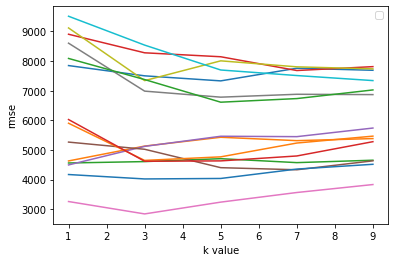

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('rmse')
    plt.legend()

## Multivariate Model

In [14]:
feature_avg_rmse = {}

for k, v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmses = pd.Series(feature_avg_rmse)
series_avg_rmses = series_avg_rmses.sort_values()
series_avg_rmses

engine_size          3346.484586
horsepower           4219.377860
width                4618.910560
curb_weight          4730.075815
highway_mpg          5069.469256
length               5176.394904
city_mpg             5202.409003
wheel_base           5252.392462
compression_ratio    7166.073599
bore                 7222.472445
normalised_losses    7624.407151
stroke               8000.240467
peak_rpm             8119.365233
height               8163.346266
dtype: float64

In [15]:
sorted_features = series_avg_rmses.index

def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_vals = [5]
    k_rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for best_feats in range(2,7):
    k_rmse_results['{} best features'.format(best_feats)] = knn_train_test(
        sorted_features[:best_feats], 'price', numeric_cars)

k_rmse_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

## Hyperparameter Tuning

In [16]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    last_train_row = int(len(rand_df) / 2)
    
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_vals = [i for i in range(1,26)]
    k_rmses = {}
    
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])
    
        predicted_labels = knn.predict(test_df[train_cols])
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

for best_feats in range(2,6):
    k_rmse_results['{} best features'.format(best_feats)] = knn_train_test(
        sorted_features[:best_feats], 'price', numeric_cars)

k_rmse_results

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

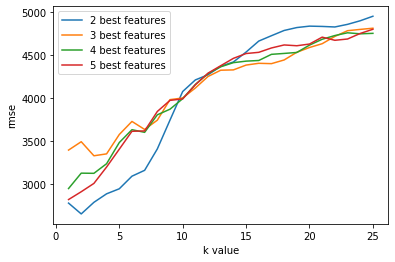

In [17]:
for k, v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y, label="{}".format(k))
    plt.xlabel('k value')
    plt.ylabel('rmse')
    plt.legend()

## K-Fold Cross Validation

In [18]:
split_one = numeric_cars.iloc[:100].copy()
split_two = numeric_cars.iloc[100:-1].copy()

train_one = split_one
test_one = split_two
train_two = split_two
test_two = split_one
print(split_one.info(), split_two.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 102
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalised_losses  100 non-null    float64
 1   length             100 non-null    float64
 2   width              100 non-null    float64
 3   height             100 non-null    float64
 4   wheel_base         100 non-null    float64
 5   curb_weight        100 non-null    float64
 6   engine_size        100 non-null    float64
 7   bore               100 non-null    float64
 8   stroke             100 non-null    float64
 9   peak_rpm           100 non-null    float64
 10  horsepower         100 non-null    float64
 11  city_mpg           100 non-null    float64
 12  compression_ratio  100 non-null    float64
 13  highway_mpg        100 non-null    float64
 14  price              100 non-null    float64
dtypes: float64(15)
memory usage: 12.5 KB
<class 'pandas.core.frame.DataFrame'>

In [19]:
numeric_cars.loc[numeric_cars.index[0:50], 'fold'] = 1
numeric_cars.loc[numeric_cars.index[50:100], 'fold'] = 2
numeric_cars.loc[numeric_cars.index[100:150], 'fold'] = 3
numeric_cars.loc[numeric_cars.index[150:200], 'fold'] = 4
numeric_cars['fold'].value_counts()

4.0    50
3.0    50
2.0    50
1.0    50
Name: fold, dtype: int64

In [20]:
fold_ids = [1,2,3,4]
def knn_train_test(df, train_cols, target_col, folds):
    fold_rmses = []
    for fold in folds:
        model = KNeighborsRegressor()
        train = df[df['fold'] != fold]
        test = df[df['fold'] == fold].copy()
        model.fit(train[train_cols], train[target_col])
    
        labels = model.predict(test[train_cols])
        mse = mean_squared_error(test[target_col], labels)
        rmse = np.sqrt(mse)
        fold_rmses.append(rmse)
    return(fold_rmses)

In [21]:
k_fold_cross = knn_train_test(numeric_cars, sorted_features, 'price', fold_ids)
k_fold_cross

[6019.730400076069, 4692.173977678151, 6524.153597885323, 2449.550554693657]

In [22]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=1)
knn = KNeighborsRegressor()
mses = cross_val_score(estimator=knn, X = numeric_cars[sorted_features], y = numeric_cars['price'], scoring='neg_mean_squared_error', cv=kf)
rmses = np.sqrt(np.absolute(mses))
avg_rmse = np.mean(rmses)
print(rmses,
     '\n',
     avg_rmse)

[2880.28785096 3933.38324944 3562.4382928  3946.51432862 2784.24745057] 
 3421.3742344782236
